In [89]:
dataFol = "C:/Users/Craig D/Code/atree/data/groundwater/cgwb_aquifer_maps"
opdf = "Tamilnadu_Aquifer.pdf"
opng = "Tamilnadu_Aquifer.png"
opnghires = "Tamilnadu_Aquifer_hires.png"
nemopng = "rgb_nemo.png"
legendpng = "legend.png"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import fitz
from pathlib import Path
import os
from PIL import Image, ImageQt, ImageColor
import colorsys

In [7]:
# doc = fitz.open(Path(dataFol).joinpath(opdf))
# page = doc.load_page(0)
# pix = page.get_pixmap()

# zoom_x = 4.0  # horizontal zoom
# zomm_y = 4.0  # vertical zoom
# mat = fitz.Matrix(zoom_x, zomm_y)  # zoom factor 2 in each dimension
# pix_hires = page.getPixmap(matrix = mat)  # use 'mat' instead of the identity matrix

# pix_hires.writeImage(Path(dataFol).joinpath(opnghires))

In [12]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

In [59]:
# Continue HERE

In [60]:
tn = cv2.imread(str(Path(dataFol).joinpath(opnghires)))
tn = cv2.cvtColor(tn,cv2.COLOR_BGR2RGB)

In [90]:
legend = cv2.imread(str(Path(dataFol).joinpath(legendpng)))
legend = cv2.cvtColor(legend,cv2.COLOR_BGR2RGB)

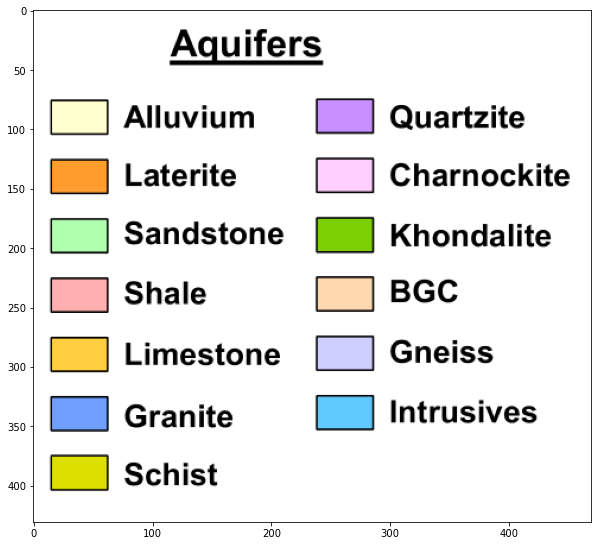

In [91]:
plt.figure(figsize=(10,13))
plt.imshow(legend)

In [92]:
hsv_tn = cv2.cvtColor(tn, cv2.COLOR_RGB2HSV)
hsv_legend = cv2.cvtColor(legend, cv2.COLOR_RGB2HSV)

In [127]:
def getHSVall(hex):
    color_rgb = list(ImageColor.getcolor(hex, "RGB"))
    color_pix = np.uint8([[color_rgb]])
    color_hsv = cv2.cvtColor(color_pix,cv2.COLOR_RGB2HSV)
    color = color_hsv[0][0]
    return (color_rgb,color_pix,color)

In [56]:
def getHSV(hex):
    color_rgb = list(ImageColor.getcolor(hex, "RGB"))
    color_pix = np.uint8([[color_rgb]])
    color_hsv = cv2.cvtColor(color_pix,cv2.COLOR_RGB2HSV)
    color = color_hsv[0][0]
    return color #(color_rgb,color_pix,color)

In [235]:
legendK = {
    'Alluvium':getHSV("#ffffcf"),
    'Laterite':getHSV("#ff9e2f"),
    'Sandstone':getHSV("#afffaf"),
    'Shale':getHSV("#ffafaf"),
    'Limestone':getHSV("#ffcf3f"),
    'Granite':getHSV("#70a0ff"),
    'Schist':getHSV("#dddf00"),
    'Quartzite':getHSV("#c890ff"),
    'Charnockite':getHSV("#ffcfff"),
    'Khondalite':getHSV("#7ccf00"),
    'BGC':getHSV("#ffd8af"),
    'Gneiss': getHSV("#CFCFFF"),
    'Intrusives':getHSV("#60caff"),
#     'White':getHSV("#ffffff")
}

In [236]:
# result = np.empty((3168,2448,3),np.int16)
del(result)
hsv = hsv_tn
rgb = tn

for key in legendK.keys():    #  ,
    mask = cv2.inRange(hsv, legendK[key], legendK[key])
    single = cv2.bitwise_and(rgb, rgb, mask=mask)
    try:
        result = result + single
    except:
        result = single        

In [250]:
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(result,kernel,iterations = 5)
# opening = cv2.morphologyEx(result, cv2.MORPH_OPEN, kernel)

In [253]:
dilation[2137][851]

array([255, 255, 255], dtype=uint8)

In [252]:
img = Image.fromarray(dilation, 'RGB')
mapPath = Path(dataFol).joinpath("temp_map_dilation5_5i.png")
img.save(str(mapPath))

In [146]:
img = Image.fromarray(single, 'RGB')
legendPath = Path(dataFol).joinpath("temp_legend1.png")
img.save(str(legendPath))

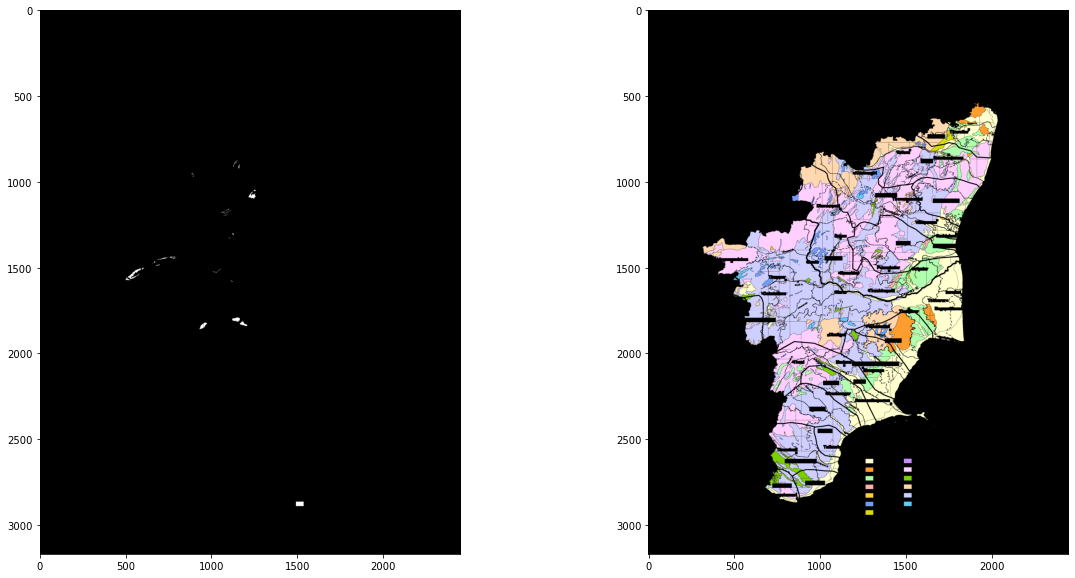

In [238]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
# plt.savefig(Path(dataFol).joinpath("temp_legend.png"),dpi=600)
plt.show()

# NEMO IMAGE

In [54]:
# https://realpython.com/python-opencv-color-spaces/
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html
# https://stackoverflow.com/questions/10948589/choosing-the-correct-upper-and-lower-hsv-boundaries-for-color-detection-withcv

In [ ]:
# https://www.rapidtables.com/convert/color/hsv-to-rgb.html
# https://www.rapidtables.com/convert/color/rgb-to-hsv.html

In [3]:
nemoPath = str(Path(dataFol).joinpath(nemopng))
print(nemoPath)
nemo = cv2.imread(nemoPath)
nemo = cv2.cvtColor(nemo,cv2.COLOR_BGR2RGB)

C:\Users\Craig D\Code\atree\data\groundwater\cgwb_aquifer_maps\rgb_nemo.png


In [4]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

## COLOR: RGB

In [20]:
light_orange_rgb = ImageColor.getcolor("#ff6c00","RGB")
dark_orange_rgb = ImageColor.getcolor("#C83632","RGB")
print("light orange rgb: ",light_orange_rgb,"\n","dark orange rgb: ",dark_orange_rgb)

light orange rgb:  (255, 108, 0) 
 dark orange rgb:  (200, 54, 50)


In [24]:
light_orange_pix = np.uint8([[list(light_orange_rgb)]])
dark_orange_pix = np.uint8([[list(dark_orange_rgb)]])

light_orange_hsv = cv2.cvtColor(light_orange_pix,cv2.COLOR_RGB2HSV)
dark_orange_hsv = cv2.cvtColor(dark_orange_pix,cv2.COLOR_RGB2HSV)

print("light orange hsv: ",light_orange_hsv,"\n","dark orange hsv: ",dark_orange_hsv)    # [[[ 60 255 255]]]

light orange hsv:  [[[ 13 255 255]]] 
 dark orange hsv:  [[[  1 191 200]]]


In [42]:
light_orange = light_orange_hsv[0][0]
dark_orange = dark_orange_hsv[0][0]
print("light orange hsv: ",light_orange,"\n","dark orange hsv: ",dark_orange)    # [[[ 60 255 255]]]

light orange hsv:  [ 13 255 255] 
 dark orange hsv:  [  1 191 200]


## COLOR: HSV

In [38]:
# Colors defined as HSV
light_orange = (13, 255, 255)   # upper blue (130,255,255)
dark_orange = (1, 191, 200)   # lower blue (110,50,50)

In [81]:
lo_square = np.full((1, 1, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((1, 1, 3), dark_orange, dtype=np.uint8) / 255.0

In [43]:
mask = cv2.inRange(hsv_nemo, dark_orange, light_orange)
result = cv2.bitwise_and(nemo, nemo, mask=mask)

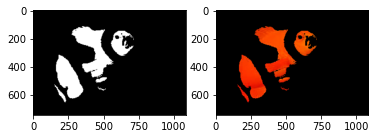

In [44]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()